##Carregando os dados

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# carregando os dados
df = pd.read_csv('ecommerce_dataset_us.csv', engine='python', sep='\t')

# visualisando os dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


## Análise Exploratória dos Dados (AED)

In [3]:
# visualizando as informações do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB
None


In [4]:
# convertendo a coluna de 'InvoiceDate' para o formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
# verificando duplictas
print(f"Linhas duplicadas: {df.duplicated().sum()}")

Linhas duplicadas: 5268


In [6]:
# removendo as linhas duplicadas
df.drop_duplicates(inplace=True)

In [7]:
# convertendo a coluna 'CustomerID' para string
df['CustomerID'] = df['CustomerID'].astype(str)

In [8]:
# preenchendo valores ausentes
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [9]:
# verificvando as informações do DataFrame novamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.8+ MB
None


In [10]:
# Análise de transações únicas
print(f"Clientes únicos: {df['CustomerID'].nunique()}")
print(f"Produtos únicos: {df['StockCode'].nunique()}")
print(f"Período: {df['InvoiceDate'].min()} a {df['InvoiceDate'].max()}")

Clientes únicos: 4373
Produtos únicos: 4070
Período: 2018-11-29 08:26:00 a 2019-12-07 12:50:00


In [11]:
# criando uma nova coluna com a receita
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# criando uma nova coluna com o dia do pedido
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# criando uma nova coluna com o mês e ano do pedido
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# criando uma nova coluna com a semana do pedido
df['InvoiceWeek'] = df['InvoiceDate'].dt.to_period('W')

# visualizando a tabela
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID  Revenue  InvoiceDay InvoiceMonth  \
0 2018-11-29 08:26:00       2.55    17850.0    15.30  2018-11-29      2018-11   
1 2018-11-29 08:26:00       3.39    17850.0    20.34  2018-11-29      2018-11   
2 2018-11-29 08:26:00       2.75    17850.0    22.00  2018-11-29      2018-11   
3 2018-11-29 08:26:00       3.39    17850.0    20.34  2018-11-29      2018-11   
4 2018-11-29 08:26:00       3.39    17850.0    20.34  2018-11-29      2018-11   

             InvoiceWeek  
0  2018-11-26/2018-12-02  
1  2018-11-26/2018-12-02  

In [12]:
# agrupando por mês e calculando o número de pedidos, usuários e receita
orders_per_month = df.groupby('InvoiceMonth').agg({'InvoiceNo': 'nunique', 'CustomerID': 'nunique', 'Revenue': 'sum'})

# renomeando as colunas
orders_per_month.columns = ['Orders', 'Customers', 'Revenue']

# visualizando a tabela
print(orders_per_month)

              Orders  Customers      Revenue
InvoiceMonth                                
2018-11          310        207   104539.880
2018-12         1715        836   642183.730
2019-01         1636        852   607854.450
2019-02         1367        789   491357.550
2019-03         1956       1003   662566.860
2019-04         1658        873   475027.041
2019-05         2292       1110   767802.050
2019-06         1931       1016   650449.140
2019-07         1969       1023   703302.801
2019-08         1813        987   724046.080
2019-09         2175       1260   950182.892
2019-10         2822       1495  1131566.720
2019-11         3552       1730  1490607.500
2019-12          704        507   324520.260


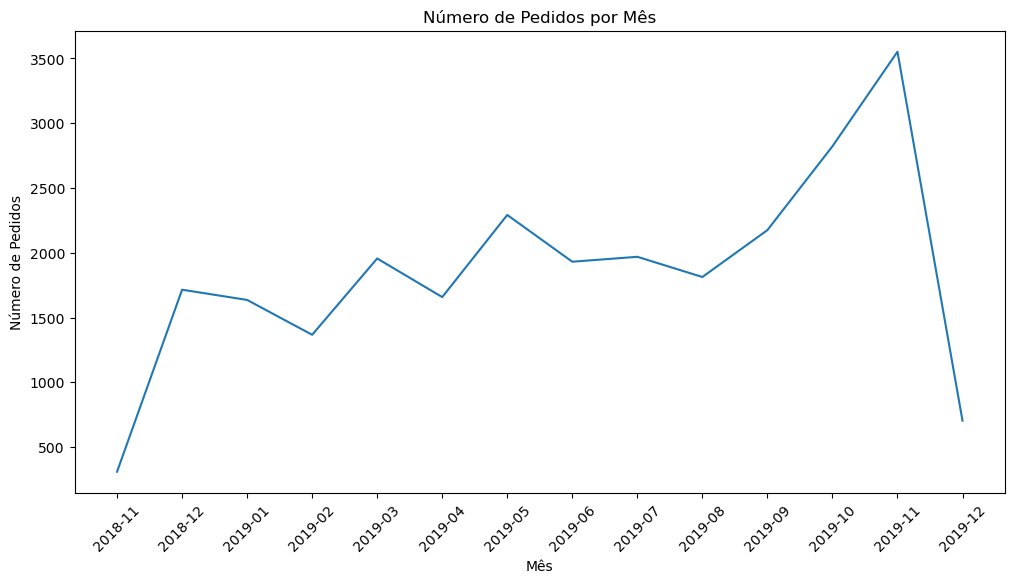

In [13]:
# plotando gráfico de número de pedidos por mês
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month.index.astype(str), orders_per_month['Orders'])
plt.title('Número de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

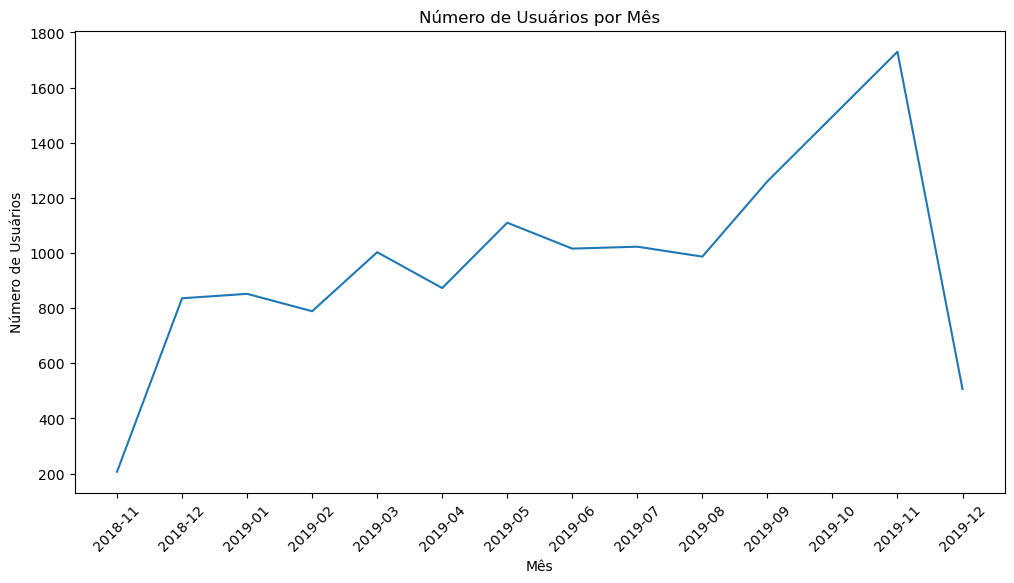

In [14]:
# plotando gráfico de número de usuários por mês
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month.index.astype(str), orders_per_month['Customers'])
plt.title('Número de Usuários por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=45)
plt.show()

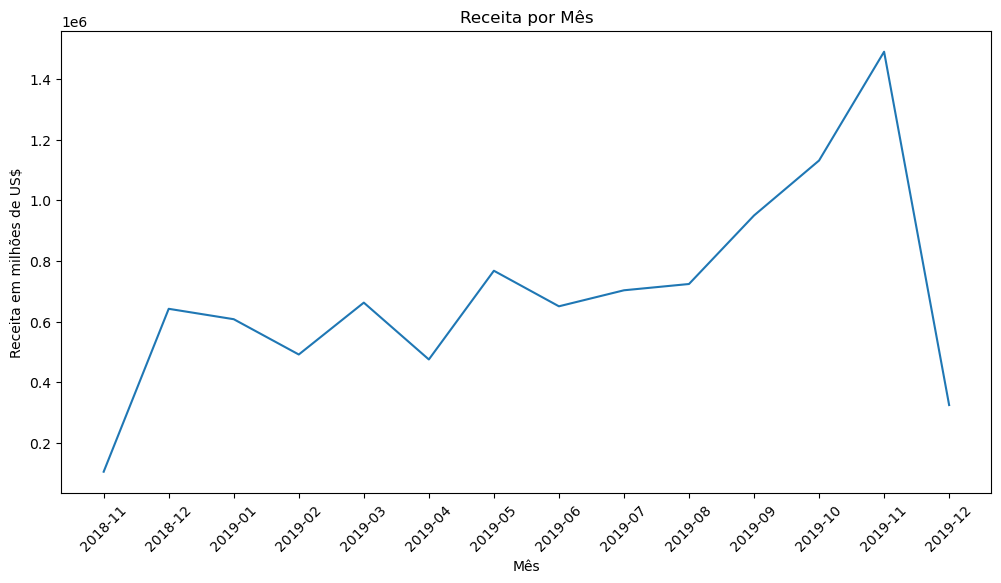

In [15]:
# plotando gráfico de receita por mês
plt.figure(figsize=(12, 6))
plt.plot(orders_per_month.index.astype(str), orders_per_month['Revenue'])
plt.title('Receita por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita em milhões de US$')
plt.xticks(rotation=45)
plt.show()

A análise dos três gráficos revela um padrão de comportamento semelhante entre as variáveis. Observamos picos coincidentes nos meses de dezembro de 2018, março, maio e novembro de 2019.

Essa sincronia sugere uma relação entre as variáveis: o aumento do número de usuários em um dado mês parece eleavar a probabilidade de mais pedidos, resultando, consequentemente, em maior receita.

In [16]:
# avaliando o DAU, WAU e MAU
dau_total = df.groupby('InvoiceDay')['CustomerID'].nunique().mean()
wau_total = df.groupby('InvoiceWeek')['CustomerID'].nunique().mean()
mau_total = df.groupby('InvoiceMonth')['CustomerID'].nunique().mean()
print(f'DAU: {dau_total:.0f}')
print(f'WAU: {wau_total:.0f}')
print(f'MAU: {mau_total:.0f}')

# calculando a taxa de retenção
sticky_wau = (dau_total / wau_total) * 100
print(f'Taxa de retenção semanal média: {sticky_wau:.2f}%')
sticky_mau = (dau_total / mau_total) * 100
print(f'Taxa de retenção mensal média: {sticky_mau:.2f}%')

DAU: 64
WAU: 335
MAU: 978
Taxa de retenção semanal média: 19.15%
Taxa de retenção mensal média: 6.56%


In [17]:
# agrupando por usuário e descobrindo a data de primeira compra
first_order_date_by_customers = df.groupby('CustomerID')['InvoiceDay'].min()
first_order_date_by_customers.name = 'first_order_date'

# juntando com df
df = df.join(first_order_date_by_customers,on='CustomerID')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         536641 non-null  object        
 1   StockCode         536641 non-null  object        
 2   Description       536641 non-null  object        
 3   Quantity          536641 non-null  int64         
 4   InvoiceDate       536641 non-null  datetime64[ns]
 5   UnitPrice         536641 non-null  float64       
 6   CustomerID        536641 non-null  object        
 7   Revenue           536641 non-null  float64       
 8   InvoiceDay        536641 non-null  object        
 9   InvoiceMonth      536641 non-null  period[M]     
 10  InvoiceWeek       536641 non-null  period[W-SUN] 
 11  first_order_date  536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), period[M](1), period[W-SUN](1)
memory usage: 53.2+ MB
None


In [18]:
# convertendo a coluna 'first_order_date' para o formato datetime
df['first_order_date'] = pd.to_datetime(df['first_order_date'])

# criando uma nova coluna com o mês do primeiro pedido
df['first_order_month'] = df['first_order_date'].dt.to_period('M')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID  Revenue  InvoiceDay InvoiceMonth  \
0 2018-11-29 08:26:00       2.55    17850.0    15.30  2018-11-29      2018-11   
1 2018-11-29 08:26:00       3.39    17850.0    20.34  2018-11-29      2018-11   
2 2018-11-29 08:26:00       2.75    17850.0    22.00  2018-11-29      2018-11   
3 2018-11-29 08:26:00       3.39    17850.0    20.34  2018-11-29      2018-11   
4 2018-11-29 08:26:00       3.39    17850.0    20.34  2018-11-29      2018-11   

             InvoiceWeek first_order_date first_order_month  
0  2018-11-26/2018

## Analisando coortes

In [19]:
# agrupando por primeiro mês de compra e contando a quantidade de pedidos, usuários e receita
cohort_grouped = df.groupby('first_order_month').agg(
    {'InvoiceNo': 'nunique', 'CustomerID': 'nunique', 'Revenue': 'sum'}
)
print(cohort_grouped)

                   InvoiceNo  CustomerID      Revenue
first_order_month                                    
2018-11                 6980         207  2731537.960
2018-12                 7049         742  3117233.890
2019-01                 2867         475  1086105.831
2019-02                 1726         367   514323.430
2019-03                 1765         415   570682.860
2019-04                 1005         286   292621.771
2019-05                  962         291   280874.340
2019-06                  716         225   211363.150
2019-07                  542         206   154974.891
2019-08                  416         162   168455.970
2019-09                  682         288   221290.761
2019-10                  718         375   218165.610
2019-11                  438         303   133491.870
2019-12                   34          31    24884.620


In [20]:
# criando uma tabela dinâmica como número de usuaários por coorte
customer_per_cohort = df.pivot_table(
    index='first_order_month',
    columns='InvoiceMonth',
    values='CustomerID',
    aggfunc='nunique',
)
customer_per_cohort

InvoiceMonth,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
first_order_month,,,,,,,,,,,,,,
2018-11,207.0,94.0,83.0,73.0,78.0,80.0,84.0,84.0,73.0,78.0,82.0,81.0,101.0,40.0
2018-12,NaN,742.0,294.0,237.0,289.0,250.0,297.0,263.0,264.0,261.0,280.0,296.0,386.0,161.0
2019-01,NaN,NaN,475.0,112.0,130.0,113.0,159.0,134.0,127.0,127.0,143.0,159.0,177.0,45.0
2019-02,NaN,NaN,NaN,367.0,91.0,66.0,102.0,99.0,87.0,85.0,101.0,99.0,110.0,24.0
2019-03,NaN,NaN,NaN,NaN,415.0,78.0,111.0,83.0,105.0,78.0,103.0,108.0,114.0,32.0
2019-04,NaN,NaN,NaN,NaN,NaN,286.0,66.0,61.0,62.0,58.0,66.0,67.0,78.0,17.0
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,291.0,67.0,49.0,50.0,62.0,72.0,85.0,16.0
2019-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,50.0,43.0,58.0,60.0,72.0,14.0
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,45.0,41.0,47.0,55.0,19.0


Observando a tabela dinâmica, chegamos as seguintes conclusões:
- A quantidade de consumidores ativos dentro de uma coorte decai bastante após o primeiro mês
- Em todos coortes, a quantidade de consumidores ativos às vezes aumenta
- A menor quantidade de consumidores ativos ocorreu em dezembro de 2019 em todos os coortes. Isso pode ter acontecido, pois não há dados completos desse mês, os dados foram coletados até o dia 7
- Os usuários da coorte de dezembro de 2018 representam a maior parcela de consumidores ativos após um ano. Em novembro de 2019, havia 386 deles

In [21]:
# agrupando por primeira compra por mês e mês da compra e calcula a receita e número de usuários
orders_grouped_by_cohorts = df.groupby(
    ['first_order_month', 'InvoiceMonth']
).agg({'Revenue': 'sum', 'CustomerID': 'nunique'})

# criando uma coluna de receita por usuário
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['Revenue']
    / orders_grouped_by_cohorts['CustomerID']
).round(2)

In [22]:
# criando uma nova coluna de lifetime dos coortes
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()

orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['InvoiceMonth']
    - orders_grouped_by_cohorts['first_order_month']
).apply(lambda x: x.n)

print(orders_grouped_by_cohorts.head())

  first_order_month InvoiceMonth    Revenue  CustomerID  revenue_per_user  \
0           2018-11      2018-11  104539.88         207            505.02   
1           2018-11      2018-12  273383.34          94           2908.33   
2           2018-11      2019-01  179554.23          83           2163.30   
3           2018-11      2019-02  118301.31          73           1620.57   
4           2018-11      2019-03  186436.46          78           2390.21   

   cohort_lifetime  
0                0  
1                1  
2                2  
3                3  
4                4  


<Axes: title={'center': 'Receita Média por Cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

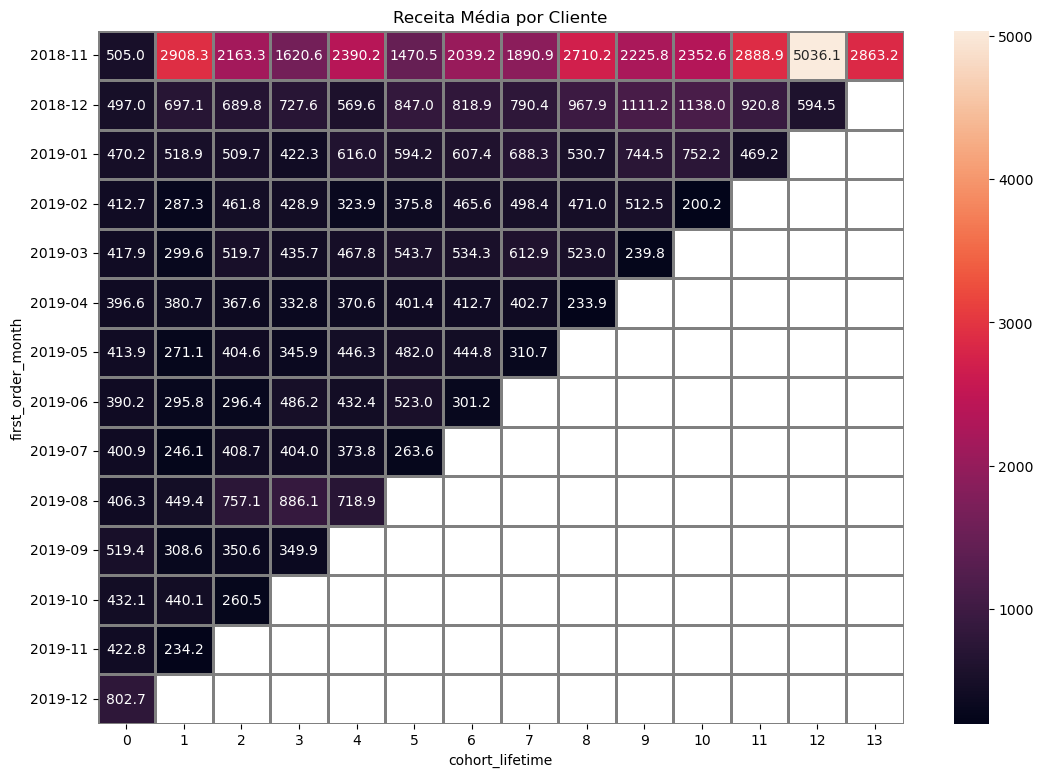

In [23]:
# construindo uma tabela dinâmica mostrando as mudanças na receita por usuário, por coortes pelo lifetime
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)

# construindo um mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Receita Média por Cliente')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

Analisando esse mapa de calor, podemos chegar as seguintes conclusões:
- Os usuários do coorte de novembro de 2018 são os que apresentam melhor receita média por usuário
- Em dezembro de 2019, todos os coortes apresentaram uma grande queda de receita em relação ao mês anterior. Isso pode ter acontecido, pois não há dados completos desse mês, os dados foram coletados até o dia 7
- A maioria dos coortes apresenta uma tendência de aumento de receita média por usuário, conforme o lifetime aumenta, apresentando quedas pontuais em alguns meses.
- Usuários do coorte de dezembro de 2019 foram os que apresentaram maior receita média no lifetime 0

<Axes: title={'center': 'Coortes: Taxa de retenção de usuários'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

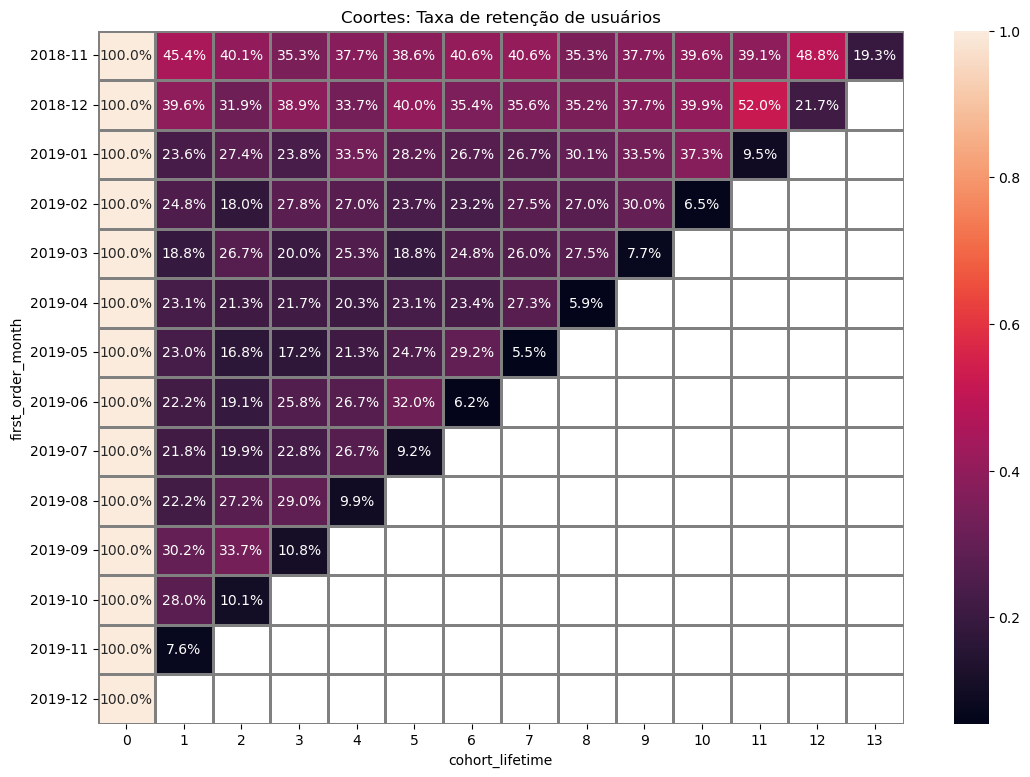

In [24]:
# criando uma coluna de lifetime em df
df['cohort_lifetime'] = (
    df['InvoiceMonth']
    - df['first_order_month']
).apply(lambda x: x.n)

# agrupando pelo primeiro mês de compra e lifetime e contando os usuários e pedidos unívocos e receita
cohorts = (
    df.groupby(['first_order_month', 'cohort_lifetime'])
    .agg({'CustomerID': 'nunique', 'InvoiceNo': 'nunique', 'Revenue': 'sum'})
    .reset_index()
)

# calculando a quantidade inicial de usuários em uma coorte
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_order_month', 'CustomerID']
]

# renomeando a coluna 'CustomerID'
initial_users_count = initial_users_count.rename(
    columns={'CustomerID': 'cohort_users'}
)

# juntando 'initial_users_count' com 'cohorts'
cohorts = cohorts.merge(initial_users_count, on='first_order_month')

# criando uma coluna com o cálculo de retenção dos usuários dos coortes
cohorts['retention'] = cohorts['CustomerID'] / cohorts['cohort_users']

# criando uma tabela dinâmico com os dados da retenção por coorte
retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')

#plotando um mapa de calor com a tabela dinâmica criada
plt.figure(figsize=(13, 9))
plt.title('Coortes: Taxa de retenção de usuários')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

Analisando esse mapa de calor, podemos concluir o seguinte:
- O coorte de dezembro de 2018 apresentou a melhor taxa de retenção
- As taxas de retenção tendem a aumentar conforme o lifetime aumenta
- Os dados de dezembro de 2019 devem ser desconsiderados, uma vez que só há dados coletados até o dia 7 desse mês

<Axes: title={'center': 'Coortes: Índice de Cancelamento'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

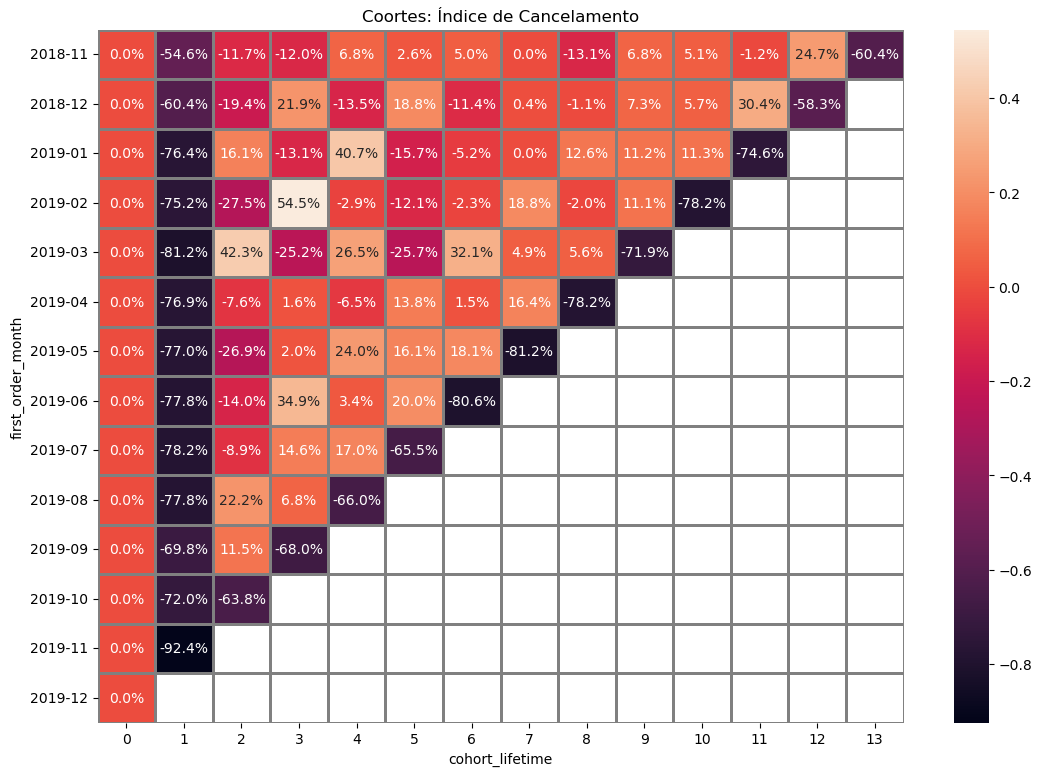

In [25]:
# criando uma coluna com o índice de cancelamento
cohorts['churn_rate'] = cohorts.groupby(['first_order_month'])['CustomerID'].pct_change()

# criando uma tabela dinâmica
churn_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='churn_rate',
    aggfunc='sum',
)

# criando um mapa de calor com o índice de cancelamento
plt.figure(figsize=(13, 9))
plt.title('Coortes: Índice de Cancelamento')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

Analisando esse mapa de calor, percebemos que:
- Os coortes de 2018 são os que apresentam menor taxa de cancelamento
- Coortes com lifetimes maiores, tendem a ter menores taxas de cancelamento
- Os índices de dezembro de 2019 devem ser desconsiderados, já que não há dados coletados até o final do mês
- Após o primeiro mês de compra, a maioria dos clientes não volta a comprar no próximo mês

## Clusterização dos clientes

__Preparando os dados__

In [26]:
# extraindo a data da última compra registrada para ser usada como data referência
snapshot_date = df['InvoiceDate'].max()

# agrupando por cliente e calculando a há quantos dias o cliente não compra, o número de pedidos e a receita
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recência (diferença entre a data de referência e a última compra)
    'InvoiceNo': 'nunique',  # Frequência
    'Revenue': 'sum'      # Valor Monetário
}).reset_index()

# renomeando as colunas
rfm = rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
})

# excluindo a linha onde CustomerID é 'nan'
rfm = rfm[rfm['CustomerID'] != 'nan']

rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,176.60
4370,18283.0,3,16,2045.53


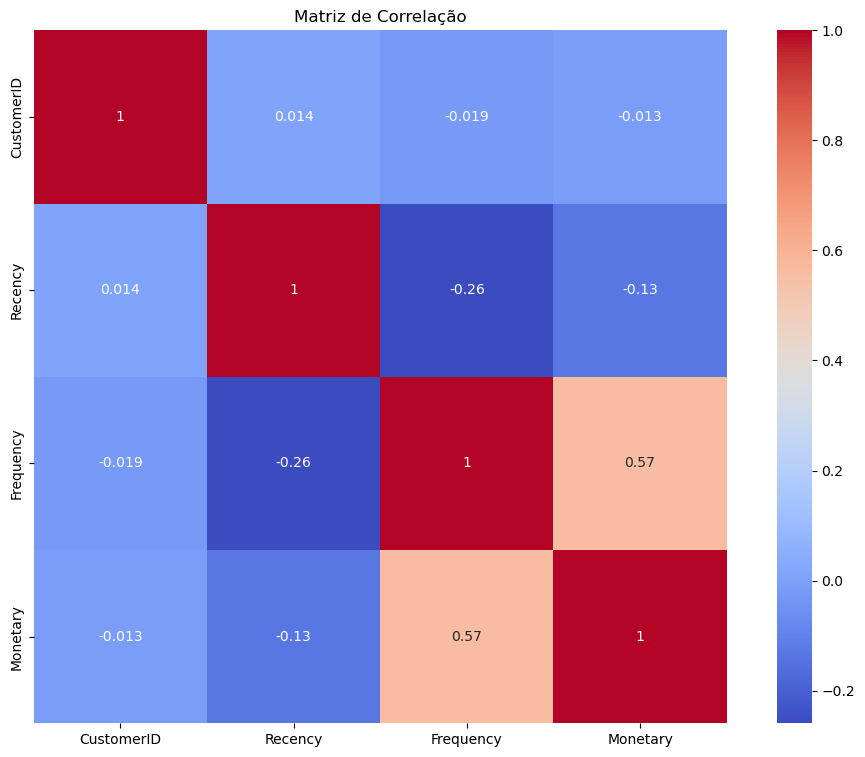

In [27]:
# criando uma matriz de correlação
plt.figure(figsize=(13, 9))
correlation_matrix = rfm.corr()
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Observando a matriz de correlação, percebemos que não há uma correlação forte entre as características. A maior correlação estabelecida é entre a frequência e a receita e fica em apenas 57%

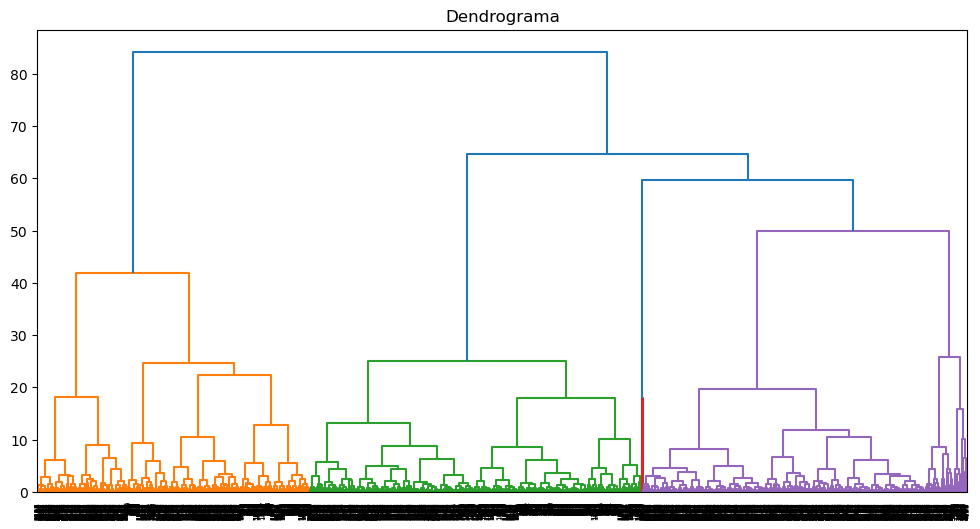

In [28]:
# importando as bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# preparando os dados para clustering
X_cluster = rfm.drop('Monetary', axis=1)

# padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# dendrograma
plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top')
plt.title('Dendrograma')
plt.show()

In [29]:
# definindo o número de agrupamentos como 4
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(X_scaled)

# criando uma nova coluna no DF com os clusters
rfm['Cluster'] = labels

# agrupando o DF por cluster e tirando a média, excluindo a coluna 'CustomerID'
cluster_means = rfm.drop('CustomerID', axis=1).groupby('Cluster').mean().round(2)
display(cluster_means)

,Recency,Frequency,Monetary
Cluster,,,
0,258.17,1.76,441.88
1,44.92,5.32,1825.41
2,43.37,5.73,2089.84
3,4.75,108.75,75641.27


**Caacterísticas de cada grupo**

Cluster 0 (clientes casuais): formado por clientes que entram poucas vezes no ano e fazem um ou outro pedido, como consequência é o agrupamento com a menor receita

Clusters 1 e 2 (clientes mensais): formados por clientes que fazem compras mensalmente, fazem cerca de 5 pedidos e trazem um valor monetário razoável

Cluster 3 (heavy users): formados por clientes que fazem compras semanalmente, fazem muitos pedidos e, consequentemente, trazem a maior receita

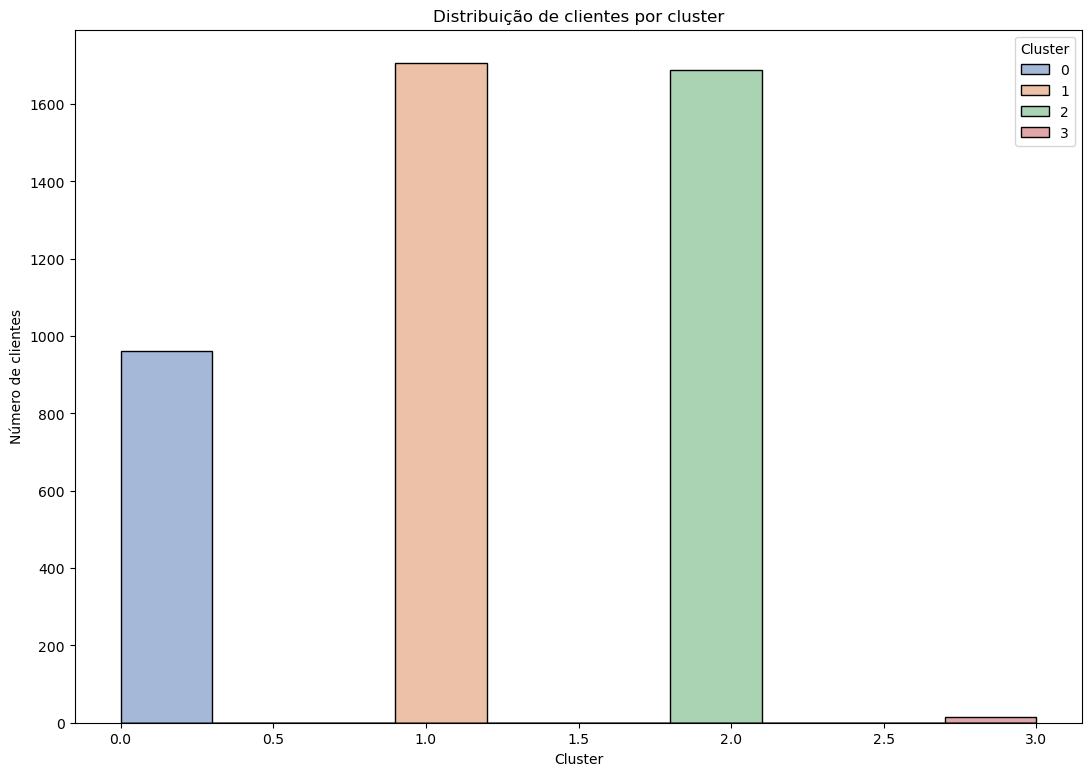

In [30]:
# histograma de distribuição de clientes por cluster
plt.figure(figsize=(13, 9))
sns.histplot(data=rfm.drop(columns=['CustomerID']), x='Cluster', bins = 10, hue='Cluster', alpha=0.5, palette='deep')
plt.title('Distribuição de clientes por cluster')
plt.ylabel('Número de clientes')
plt.xlabel('Cluster')
plt.show()

Analisando o gráfico, podemos concluir que os clusters que representam a maioria dos clientes são os clusters 1 e 2, com mais de 1600 clientes cada. O cluster 3, apesar de ser o que traz um maior valor monetário, é o que menos representa a totalidade dos clientes (menos de 100 clientes).

## Texte de hipóteses

Hipótese 1: Clientes do cluster 2 têm valor médio de compra significativamente maior que clientes do cluster 1.

In [31]:
# criando DFs com clusters alvos
cluster_1 = rfm[rfm['Cluster'] == 1]['Monetary']
cluster_2 = rfm[rfm['Cluster'] == 2]['Monetary']

# determinando alpha
alpha = 0.05

# realizando o t-teste
t_stat, p_value = st.ttest_ind(cluster_2, cluster_1, equal_var=False)

if p_value < alpha:
  print("Hipótese nula rejeitada: Clientes do cluster 2 têm valor médio de compra significativamente maior que clientes do cluster 1.")
else:
  print("Não há evidência suficiente para rejeitar a hipótese nula.")

Não há evidência suficiente para rejeitar a hipótese nula.


Hipótese 2: A frequência de compras difere entre os clusters 2 e 1.

In [32]:
# selecionando as frequências dos dois clusters
cluster_1_freq = rfm[rfm['Cluster'] == 0]['Frequency']
cluster_2_freq = rfm[rfm['Cluster'] == 1]['Frequency']

# realizando o teste-t
t_stat, p_value = st.ttest_ind(cluster_2_freq, cluster_1_freq, equal_var=False)

if p_value < alpha:
  print("Hipótese nula rejeitada: A frequência de compras difere entre os clusters 2 e 1.")
else:
  print("Não há evidência suficiente para rejeitar a hipótese nula.")

Hipótese nula rejeitada: A frequência de compras difere entre os clusters 2 e 1.


## Conclusão

A segmentação dos usuários foi feita de duas maneiras. Primeiramente, por coortes de mês de primeira compra do cliente e depois por clusters.

__Análise dos coortes__
- A queda acentuada de clientes ativos após o primeiro mês (comum a todas as coortes) indica dificuldade em reter clientes além da compra inicial. Isso sugere a necessidade de estratégias de pós-venda para engajar os clientes.
- Desempenho notável da coorte de dezembro/2018: Essa coorte manteve a maior base de clientes ativos após 11 meses (386 em novembro/2019) e a melhor taxa de retenção.
- A tendência de aumento da receita média por usuário ao longo do lifetime sugere que clientes retidos tendem a gerar mais valor. A coorte de novembro/2018 lidera em receita, reforçando que coortes mais antigas (e bem-sucedidas) são as mais lucrativas.

__Clusterização__
- Os clusters 1 e 2 (clientes mensais) representam a maioria da base, o que é típico em muitos negócios. Eles são importantes para a receita regular.
- O cluster 3 (heavy users) é o mais valioso, apesar de menor em quantidade, por gerar a maior receita. Eles devem ser alvo de estratégias de fidelização e retenção premium.
- O cluster 0 (clientes casuais) gera menos receita e pode representar clientes em teste ou que não encontraram valor suficiente no produto/serviço.

__Teste de Hipóteses__
- A Hipótese 1 foi rejeitada, indicando que o ticket médio é estatisticamente similar.
- A confirmação da Hipótese 2 revela que a frequência é o fator crítico para distinguir clusters 1 e 2. Estratégias devem focar em aumentar a recorrência (ex.: programas de assinatura).

__Recomendações__
- Priorize a retenção pós-primeira compra:
A queda inicial de clientes exige ações como e-mail marketing pós-venda, ofertas personalizadas ou suporte proativo.
- Invista nos clientes mensais (clusters 1 e 2):
São a maioria da base e geram receita consistente (ex.: campanhas de fidelidade que geram recompensas por frequência).
- Aproveite o potencial dos heavy users (cluster 3):
Ofereça benefícios exclusivos (ex.: acesso antecipado, descontos volumétricos) para mantê-los ativos.
- Monitore coortes antigas:
Coortes como dezembro/2018 são referências para entender fatores de sucesso em aquisição e retenção.